These tests are based on:
https://github.com/jobovy/extreme-deconvolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from extreme_deconvolution import extreme_deconvolution 

In [3]:
from sklearn.datasets import make_blobs

### 1D - multiple Gaussians

XD - fit
amp:  [0.08269598 0.61193016 0.30537385]
mean:  [-4.11825802  8.0313791   0.89123652]
cov: [[[0.74856001]]

 [[2.46176294]]

 [[4.54092187]]]

(3001, 1)
(3001, 1)
(3,)
(3, 1)
(3, 1, 1)


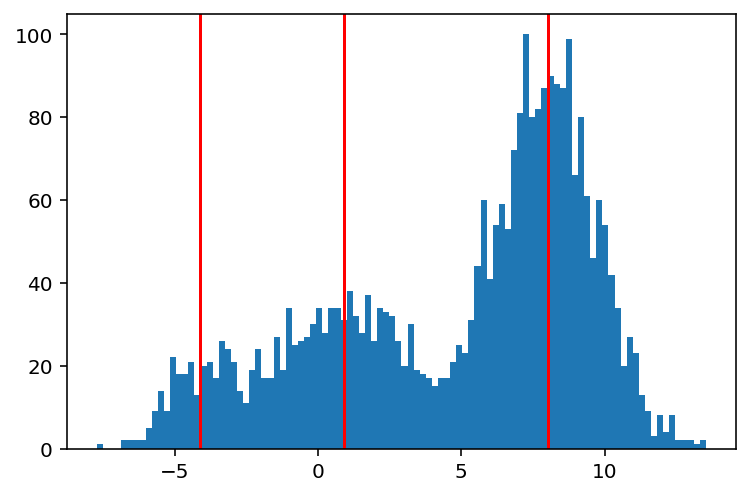

In [4]:
def XD_1D_triple_Gauss():
    ### https://github.com/jobovy/extreme-deconvolution/blob/master/tests/test_log.py
    # Like in oned, but also log
    ndata= 3001
    amp_true= [0.1,0.3,0.6]
    assign= np.random.choice(np.arange(3),p=amp_true,size=ndata)
    ydata= np.zeros((ndata,1))
    ydata[assign==0,0]= np.random.normal(size=np.sum(assign==0))-4.
    ydata[assign==1,0]= np.random.normal(size=np.sum(assign==1))*2.+1.
    ydata[assign==2,0]= np.random.normal(size=np.sum(assign==2))*1.5+8.
    ycovar= np.ones_like(ydata)*\
        np.atleast_2d(np.random.uniform(size=ndata)).T
    ydata+= np.atleast_2d(np.random.normal(size=ndata)).T\
        *np.sqrt(ycovar)
    # initialize fit
    K= 3
    initamp= np.ones(K)/float(K)
    initmean= np.array([[0],[0.],[0]])#np.array([[-1.],[0.],[1.]])
    initcovar= np.zeros((K,1,1))
    for kk in range(K):
        initcovar[kk]= np.mean(3.*np.var(ydata))
    # Run XD
    extreme_deconvolution(ydata,ycovar,initamp,initmean,initcovar,
                          maxsnm=True)
    print('XD - fit')        
    print('amp: ',initamp)
    print('mean: ',initmean.ravel())
    print('cov:',initcovar)
    
    print()
    print(ydata.shape)
    print(ycovar.shape)
    print(initamp.shape)
    print(initmean.shape)
    print(initcovar.shape)
    
    plt.hist(ydata, bins=100)
    
    for comp in initmean:
        plt.axvline(*comp, c='r')


XD_1D_triple_Gauss()

### custom wrapper 1D - multi Gauss

(3001, 1)
9.119905019662793
-7.792078529457028
6.044891962046246


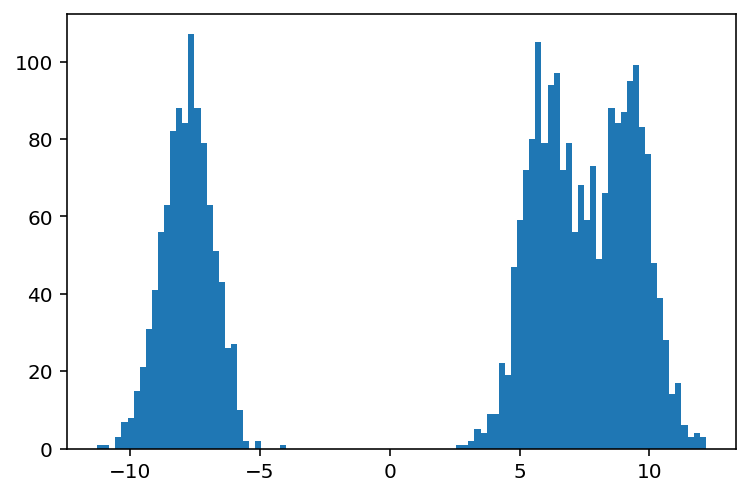

In [5]:
rng = np.random.RandomState(3131)

data, labels = make_blobs(n_samples=3001, n_features=1, random_state=rng, centers=3)

print(data.shape)

if data.shape[1] ==2:
    plt.scatter(data[:,0],data[:,1])
if data.shape[1] ==1:
    plt.hist(data, bins=100)
    
for label in set(labels):
    print(data[labels==label].mean())

In [6]:
def XD_1D_Ncomp(data, N=1, dim=1, run=False):
    
    rng = np.random.RandomState(5678)
    # Generate data from a single Gaussian, recover mean and variance
    # Also log
    ndata= data.shape[0]
#     ydata= rng.normal(size=(ndata,2))+np.array([[1.,2.]])
    ycovar= np.ones_like(data)\
        *rng.uniform(size=(ndata,dim))/2.
    ydata = data.copy() + rng.normal(size=(ndata,dim))*np.sqrt(ycovar)
    # initialize fit
    initamp= np.ones(N)
    initmean= np.atleast_2d(np.mean(ydata,axis=0)\
                                   +np.std(ydata,axis=0))
    
    initcovar= np.atleast_3d(np.cov(ydata,rowvar=False)).T

    
#     initmean = np.tile(initmean,N).reshape(N,dim)
#     initmean = np.atleast_2d([[-10],[5],[10]])
#     initcovar = np.tile(initcovar,N).reshape(N,dim,dim)
    # initialize fit
    K= 3
    initamp= np.ones(K)/float(K)
    initmean= np.array([[0],[0.],[0]])#np.array([[-1.],[0.],[1.]])
    initcovar= np.zeros((K,1,1))
    for kk in range(K):
        initcovar[kk]= np.mean(3.*np.var(ydata))
        
    print('initial')
    print(initamp)
    print(initmean)
    print(initcovar)
    print()
    
    # Run XD
    # logfile= 'test_log'
    if run: 
        extreme_deconvolution(ydata,ycovar,initamp,initmean,initcovar,maxsnm=True)
        
        print('XD - fit')        
        print('amp: ',initamp)
        print('mean: ',initmean.ravel())
        print('cov:',initcovar)
    
    # First test that the fit worked
    
    print()
    print(ydata.shape)
    print(ycovar.shape)
    print(initamp.shape)
    print(initmean.shape)
    print(initcovar.shape)
    
    plt.hist(ydata, bins=100)
    
    for comp in initmean:
        plt.axvline(*comp, c='r')

initial
[0.33333333 0.33333333 0.33333333]
[[0.]
 [0.]
 [0.]]
[[[165.86086733]]

 [[165.86086733]]

 [[165.86086733]]]

XD - fit
amp:  [0.33322226 0.33476835 0.33200939]
mean:  [-7.79394548  9.13352316  5.99768506]
cov: [[[0.90056981]]

 [[0.94645772]]

 [[0.98101585]]]

(3001, 1)
(3001, 1)
(3,)
(3, 1)
(3, 1, 1)


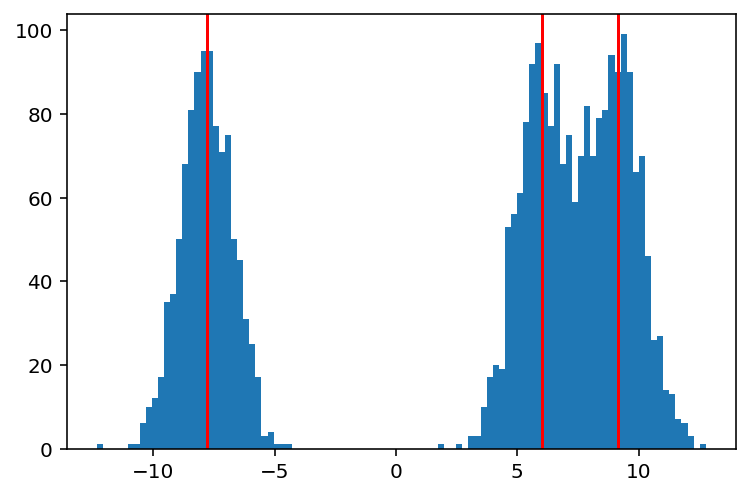

In [7]:
XD_1D_Ncomp(data,N=3, run=True)

### 2D - multi Gauss

[1.]
[[2.16436805 3.10964318]]
[[[1.25248018 0.03525682]
  [0.03525682 1.27574432]]]

(3001, 2)
(3001, 2)
(1,)
(1, 2)
(1, 2, 2)


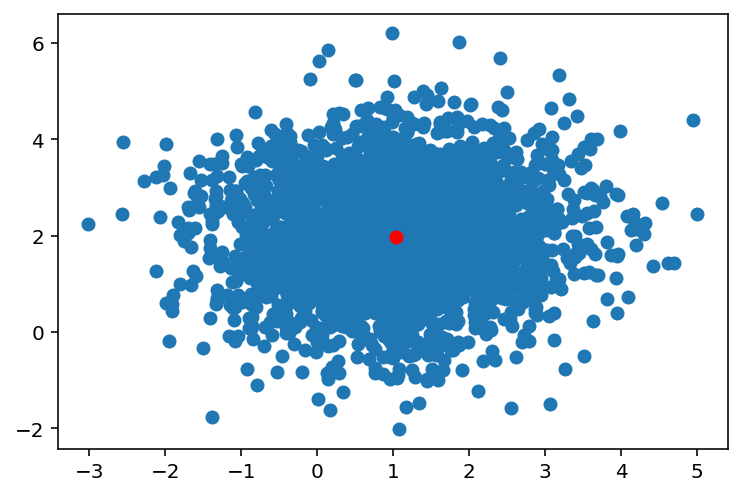

In [8]:
def XD_2D_single_Gauss():
    ### https://github.com/jobovy/extreme-deconvolution/blob/master/tests/test_log.py
    # Generate data from a single Gaussian, recover mean and variance
    # Also log
    ndata= 3001
    ydata= rng.normal(size=(ndata,2))+np.array([[1.,2.]])
    ycovar= np.ones_like(ydata)\
        *rng.uniform(size=(ndata,2))/2.
    ydata+= rng.normal(size=(ndata,2))*np.sqrt(ycovar)
    # initialize fit
    K= 1
    initamp= np.ones(K)
    initmean= np.atleast_2d(np.mean(ydata,axis=0)\
                                   +np.std(ydata,axis=0))
    initcovar= np.atleast_3d(np.cov(ydata,rowvar=False)).T

    print(initamp)
    print(initmean)
    print(initcovar)

    # Run XD
    # logfile= 'test_log'
    extreme_deconvolution(ydata,ycovar,initamp,initmean,initcovar)#,
    #                       logfile=logfile)
    # First test that the fit worked
    
    plt.scatter(ydata[:,0], ydata[:,1])

    for comp in initmean:
        plt.scatter(*comp, c='r')


    print()
    print(ydata.shape)
    print(ycovar.shape)
    print(initamp.shape)
    print(initmean.shape)
    print(initcovar.shape)
XD_2D_single_Gauss()

(3001, 2)
[ 2.30571951 -4.37909386]
[-7.45803335 -3.68275895]
[ 9.94250748 -1.54524058]


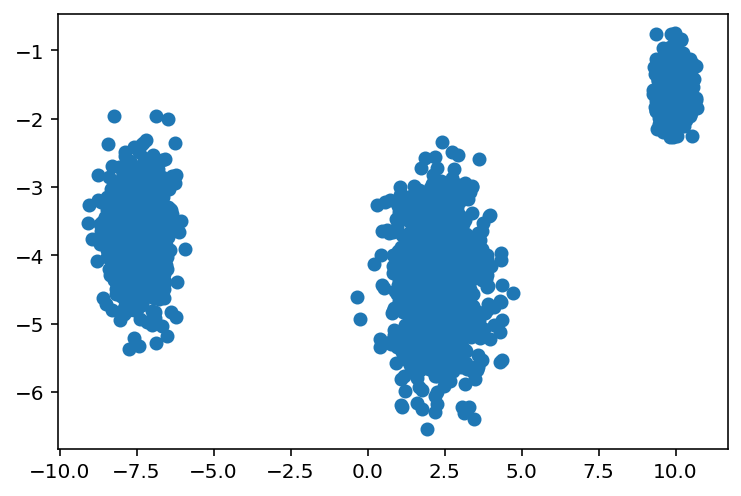

In [9]:
rng = np.random.RandomState(315)

data, labels = make_blobs(n_samples=3001, n_features=2, random_state=rng, centers=3, cluster_std = [0.75,0.5,0.25])

print(data.shape)

if data.shape[1] ==2:
    plt.scatter(data[:,0],data[:,1])
if data.shape[1] ==1:
    plt.hist(data, bins=100)
    
for label in set(labels):
    print(data[labels==label].mean(axis=0))

In [10]:

from sklearn.mixture import GaussianMixture


def initial_guess_from_GMM(X, n_components=2, random_state=0):
    GMM = GaussianMixture(n_components=n_components, random_state=random_state)
    GM = GMM.fit(X)
    return (GM.means_, GM.covariances_)

initial
[0.33333333 0.33333333 0.33333333]
[[ 2.30571951 -4.37909386]
 [-7.45803335 -3.68275895]
 [ 9.94250748 -1.54524058]]
[[[ 0.55003008 -0.00676567]
  [-0.00676567  0.51939613]]

 [[ 0.24632356 -0.00948649]
  [-0.00948649  0.25989613]]

 [[ 0.05972679 -0.00170251]
  [-0.00170251  0.0601795 ]]]

(3001, 2)
(3001, 2)
(3,)
(3, 2)
(3, 2, 2)

XD - fit
amp:  [0.33355548 0.33322226 0.33322226]
mean:  [[ 2.3091999  -4.39755326]
 [-7.44086639 -3.67906702]
 [ 9.94017716 -1.53414218]]
cov: [[[ 5.63481676e-01  2.75704591e-04]
  [ 2.75704591e-04  4.86875842e-01]]

 [[ 2.39305604e-01  1.36055725e-02]
  [ 1.36055725e-02  2.59798133e-01]]

 [[ 5.30235224e-02 -5.90370326e-03]
  [-5.90370326e-03  6.75622739e-02]]]


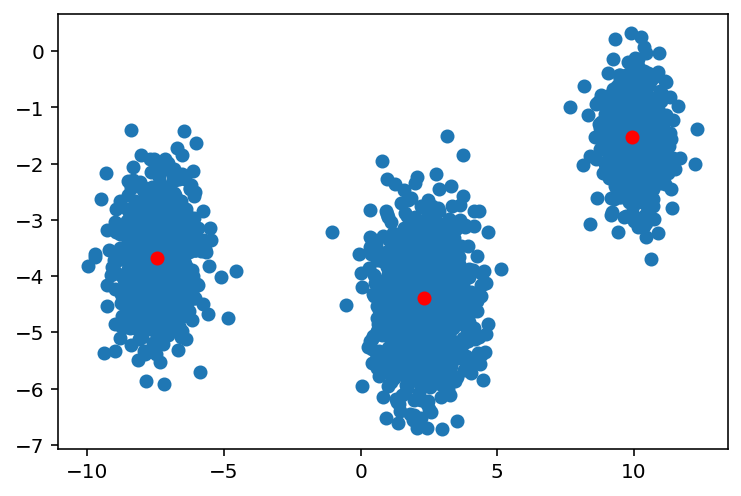

In [11]:
def XD_ND_Ncomp(data, n_components=3, dim=2, run=False):
    
    rng = np.random.RandomState(354)
    ndata= data.shape[0]
 
    # Convolve data with uncertainties
    ycovar= rng.uniform(size=(ndata,dim))/2.
    ydata = data.copy() + rng.normal(scale = np.sqrt(ycovar), size=(ndata,dim))

    ### initialize fit with GMM
    # shape initamp:   (ncomp)
    # shape initmean:  (ncomp, ndim)
    # shape initcovar: (ncomp, ndim, ndim)
    K= n_components
    initamp= np.ones(K)/float(K)
    initmean, initcovar = initial_guess_from_GMM(data,n_components)
        
    print('initial')
    print(initamp)
    print(initmean)
    print(initcovar)
    print()
    
        
    print(ydata.shape)
    print(ycovar.shape)
    print(initamp.shape)
    print(initmean.shape)
    print(initcovar.shape)
    print()


    # Run XD
    if run: 
        extreme_deconvolution(ydata,ycovar,initamp,initmean,initcovar,maxsnm=True)
        
        print('XD - fit')        
        print('amp: ',initamp)
        print('mean: ',initmean)
        print('cov:',initcovar)
    

    # Plotting the results
    plt.scatter(ydata[:,0], ydata[:,1])

    for comp in initmean:
        plt.scatter(*comp, c='r')


        
XD_ND_Ncomp(data, run=True)

(3001, 2)
[ 2.30571951 -4.37909386]
[-7.45803335 -3.68275895]
[ 9.94250748 -1.54524058]


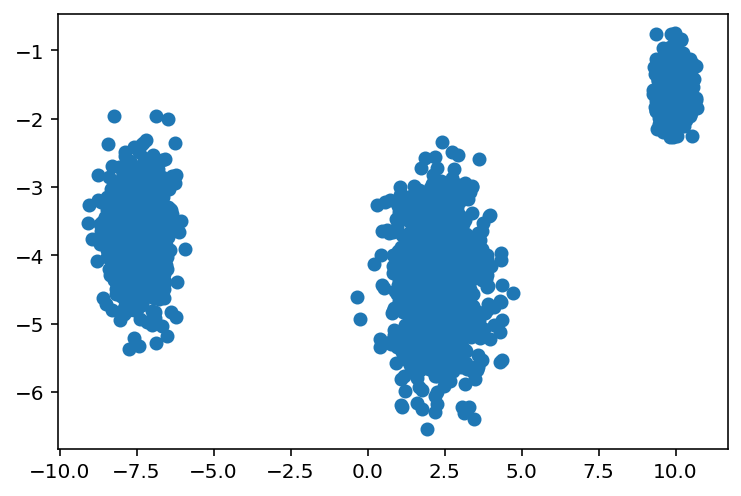

In [12]:
rng = np.random.RandomState(315)

data, labels = make_blobs(n_samples=3001, n_features=2, random_state=rng, centers=3, cluster_std = [0.75,0.5,0.25])


print(data.shape)

if data.shape[1] ==2:
    plt.scatter(data[:,0],data[:,1])
if data.shape[1] ==1:
    plt.hist(data, bins=100)
    
for label in set(labels):
    print(data[labels==label].mean(axis=0))

In [13]:
def XD_ND_Ncomp(data, n_components=3, dim=2, run=False):
    
    rng = np.random.RandomState(354)
    ndata= data.shape[0]
 
    # Convolve data with uncertainties
    
    noise_var = rng.uniform(size=(ndata,dim))/2.
    noise_cor = np.product(np.sqrt(noise_var), axis=1) * -1#rng.uniform(low=-1., high=1., size=ndata)
    I2 = np.eye(2)
    cov =  np.array([-(I2-1)*noise_cor[i] + I2*noise_var[i] for i in range(ndata)])
    ydata = np.array([rng.multivariate_normal(data[i], cov[i]).tolist() for i in range(ndata)])
    
    ycovar = cov
    
    ### initialize fit with GMM
    # shape initamp:   (ncomp)
    # shape initmean:  (ncomp, ndim)
    # shape initcovar: (ncomp, ndim, ndim)
    K= n_components
    initamp= np.ones(K)/float(K)
    initmean, initcovar = initial_guess_from_GMM(data,n_components)
        
    if False:
        print('initial')
        print(initamp)
        print(initmean)
        print(initcovar)
        print()

        
    print(ydata.shape)
    print(ycovar.shape)
    print(initamp.shape)
    print(initmean.shape)
    print(initcovar.shape)
    print()


    # Run XD
    if run: 
        extreme_deconvolution(ydata,ycovar,initamp,initmean,initcovar,maxsnm=True)
        
        print('XD - fit')        
        print('amp: ',initamp)
        print('mean: ',initmean)
        print('cov:',initcovar)
    

    # Plotting the results
    plt.scatter(ydata[:,0], ydata[:,1])

    for comp in initmean:
        plt.scatter(*comp, c='r')


        


(3001, 2)
(3001, 2, 2)
(3,)
(3, 2)
(3, 2, 2)

XD - fit
amp:  [0.33355548 0.33322226 0.33322226]
mean:  [[ 2.30202424 -4.37033885]
 [-7.47372035 -3.67308612]
 [ 9.94545108 -1.54625885]]
cov: [[[ 0.57275216 -0.02015406]
  [-0.02015406  0.53383628]]

 [[ 0.23526858 -0.02171791]
  [-0.02171791  0.29297821]]

 [[ 0.0688768  -0.00629666]
  [-0.00629666  0.06006917]]]


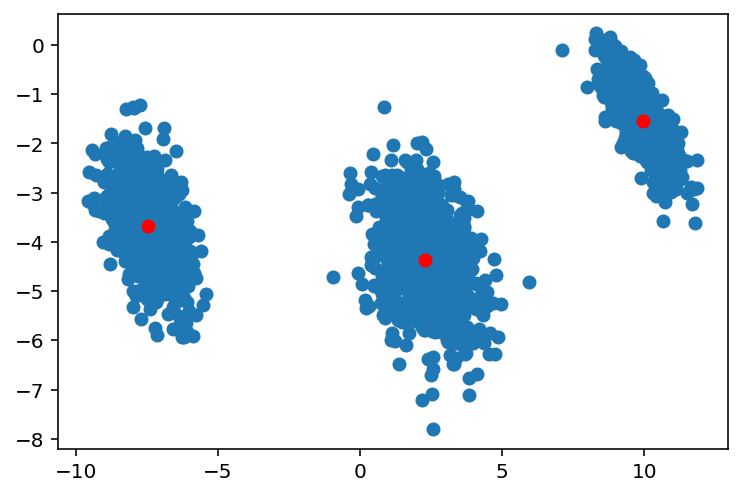

In [14]:
XD_ND_Ncomp(data, run=True)